In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mount your drive

In [ ]:
%cd /content/drive/MyDrive/'Colab Notebooks'/RL2023/DP/
!ls
import sys; sys.path.append('..') # add project root to the python path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gridworld import *
np.random.seed(0)
import copy

/content/drive/MyDrive/Colab Notebooks/RL2023/DP
gridworld.py  RL23_DP_practice_student.ipynb


## Initialize `GridWorld` 

width: `nx` /
height: `ny` 

In [ ]:
nx = 5
ny = 5
env = GridworldEnv([ny, nx])

/usr/local/lib/python3.9/dist-packages/gym/utils/seeding.py:41: DeprecationWarning: WARN: Function `rng.rand(*size)` is marked as deprecated and will be removed in the future. Please use `Generator.random(size)` instead.
  deprecation(


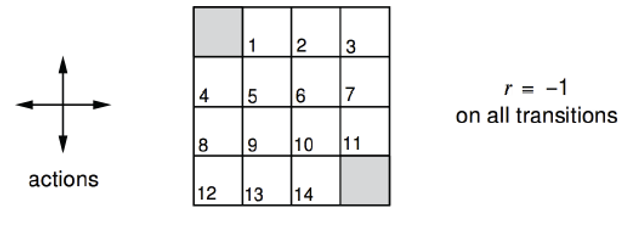


In [ ]:
ns=env.nS
na=env.nA
policy=np.ones([env.nS, env.nA]) / env.nA  # [num. states x num. actions] 정책함수
P=env.P_tensor # [num. actions X num. states X num. states] 상태천이확률함수(state transition matrix)
R=env.R_tensor # [num. states x num. actions] 보상함수
gamma=1.0

In [ ]:
print('No. of state')
print(ns)

print('No. of action')
print(na)

print('policy')
print(policy.shape)

print('State transition Matrix')
print(P.shape)
print(P)

print('Reward')
print(R.shape)
print(R)

print('policy')
print(policy.shape)
print(policy)

No. of state
25
No. of action
4
policy
(25, 4)
State transition Matrix
(4, 25, 25)
[[[1. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 1.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]]]
Reward
(25, 4)
[[ 0.  0.  0.  0.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]

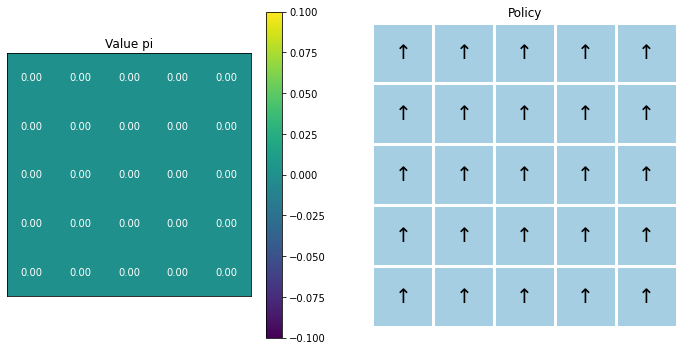

In [ ]:
# Visualization value and policy
v = np.zeros(ns)
fig, ax = plt.subplots(1,2, figsize=(12,6))
visualize_value_function(ax[0], v, nx, ny)
_ = ax[0].set_title("Value pi")
visualize_policy(ax[1], policy, nx, ny)
_ = ax[1].set_title("Policy")

In [ ]:
# input - v:value, pi:policy, no_iter:number of iteration
# output - new_value
def IteraticePolicyEvaluation (v, pi, no_iter=1):
  new_v = copy.deepcopy(v)

  for i in range(no_iter) :
    for s in range(ns) :
      new_v[s] = 0
      for a in range(na) :
        val = 0
        for s_ in range(ns) :
          val = val + P[a, s, s_] * v[s_]
        new_v[s] += pi[s, a] * (R[s, a] + gamma * val)
  v = copy.deepcopy(new_v)

  return v

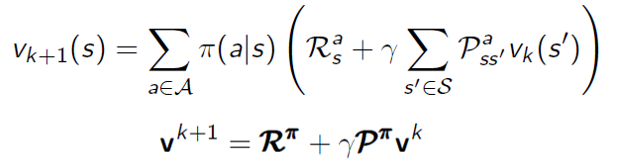


In [ ]:
# input - v:value, pi:policy
# output - new_pi
# Greedy method
def PolicyImprovement(v, pi):

  for s in range(ns) :
    best_a = -1
    best_Q = -100000
    for a in range(na) :
      val = 0
      for s_ in range(ns) :
        val = val + P[a, s, s_] * v[s_]
      if val > best_Q :
        best_Q = val
        best_a = a
      pi[s, :] = 0
      pi[s, best_a] = 1
  
  return pi

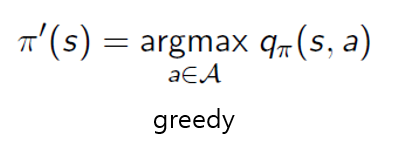

In [ ]:
# input - no_iter: number of iteration, v, p : initial value, policy (do not use for calucation)
# output -  v_opt:optical value, pi_opt:optimal policy
# Greedy method
def ValueIteration(v, p, no_iter):
  v_opt = copy.deepcopy(v)
  pi_opt = copy.deepcopy(p)

  for i in range(no_iter):
    for s in range(ns):
      v_opt[s] = 0
      v_max = float("-inf")   
      a_max = -1
      for a in range(na):
        Pv = 0
        for s_ in range(ns):
          Pv = Pv + P[a, s, s_] * v[s_] 
        if (R[s,a] + gamma * Pv) > v_max:
          v_max = (R[s,a] + gamma * Pv)
          a_max = a
        v_opt[s] = v_max
        pi_opt[s, :] = 0.0
        pi_opt[s, a_max] = 1.0
    v = copy.deepcopy(v_opt)

  return v_opt, pi_opt

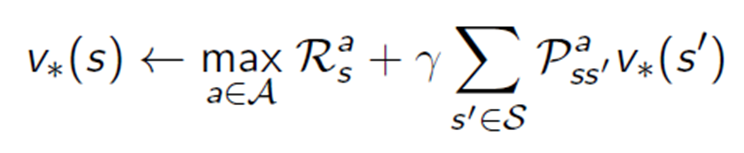


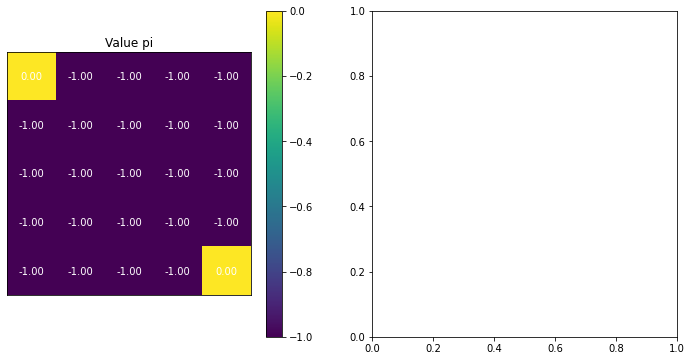

In [ ]:
#  main

# practice 1 - Iteratice Policy Evaluation
v = np.zeros(ns)
policy=np.ones([env.nS, env.nA]) / env.nA 
v = IteraticePolicyEvaluation(v, policy, 10)

fig, ax = plt.subplots(1,2, figsize=(12,6))
visualize_value_function(ax[0], v, nx, ny)
_ = ax[0].set_title("Value pi")

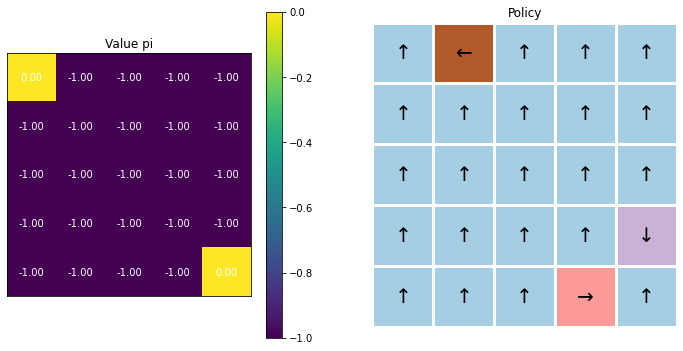

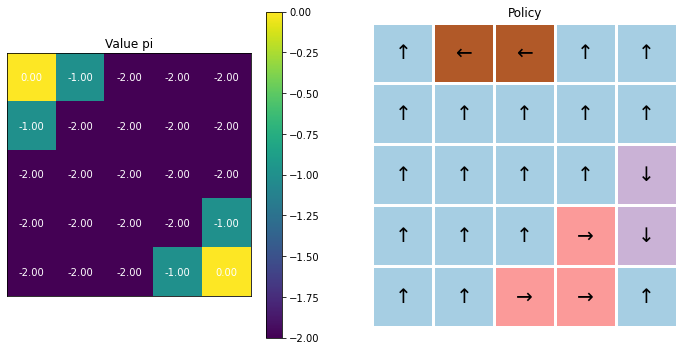

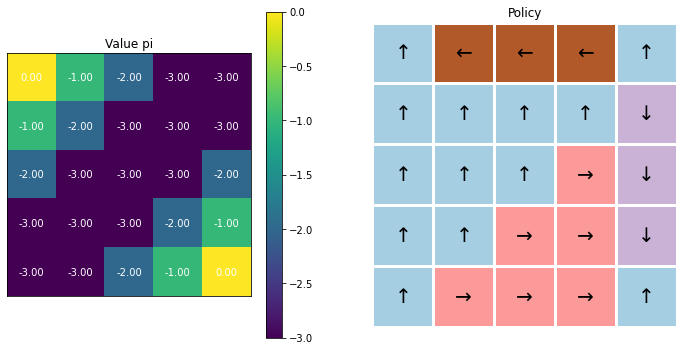

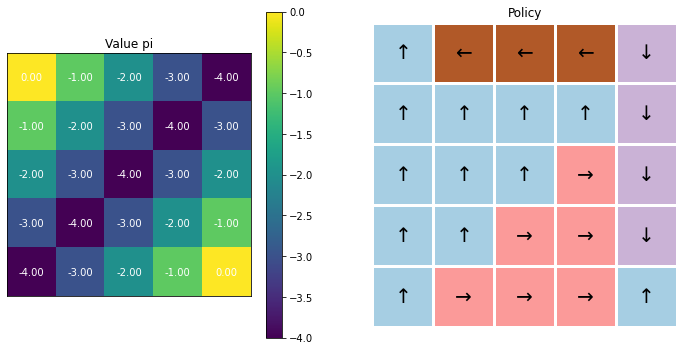

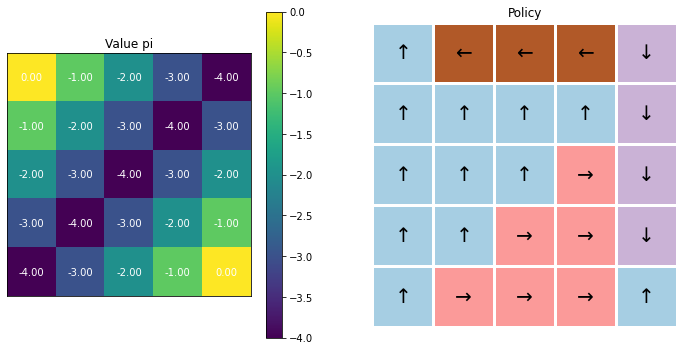

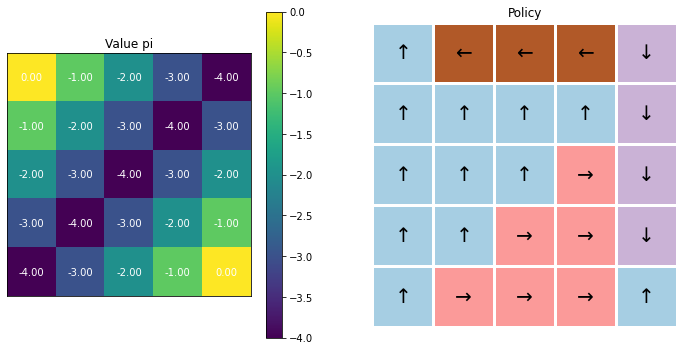

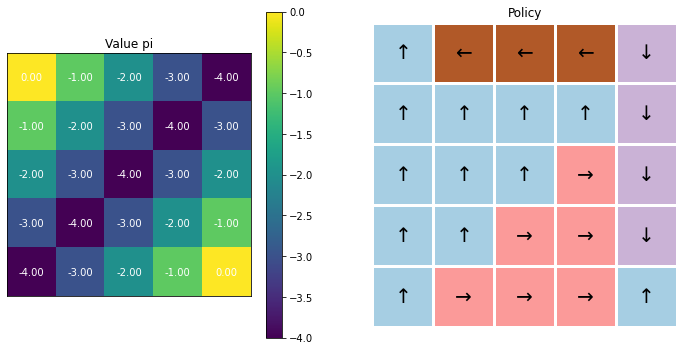

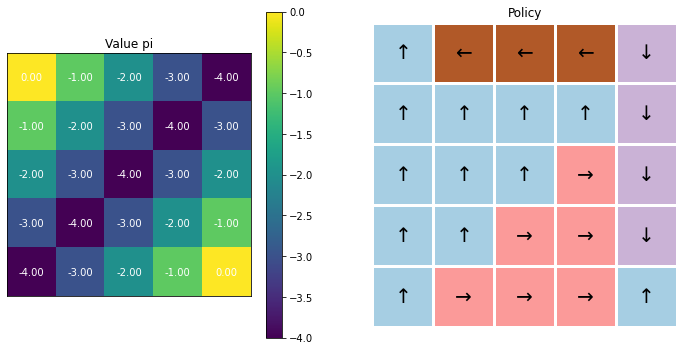

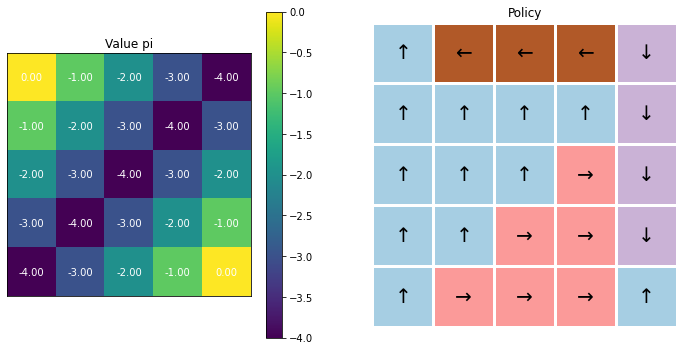

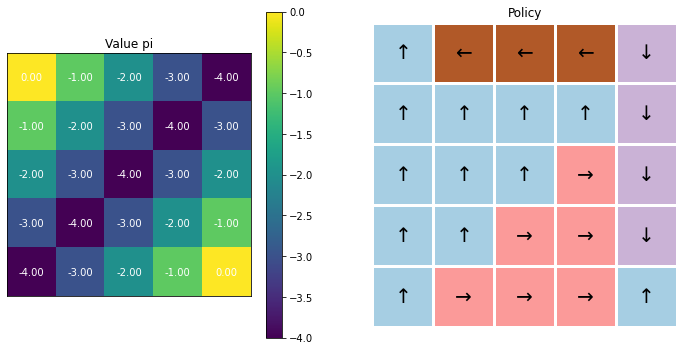

In [ ]:
# practice 2 - policy iteration
# method iterative call: Iteratice Policy Evaluation and Policy Improvement
v = np.zeros(ns)
policy=np.ones([env.nS, env.nA]) / env.nA 
iteration = 10
for i in range(iteration):
  v = IteraticePolicyEvaluation(v, policy, 10)
  policy = PolicyImprovement(v, policy)

  fig, ax = plt.subplots(1,2, figsize=(12,6))
  visualize_value_function(ax[0], v, nx, ny)
  _ = ax[0].set_title("Value pi")
  visualize_policy(ax[1], policy, nx, ny)
  _ = ax[1].set_title("Policy")

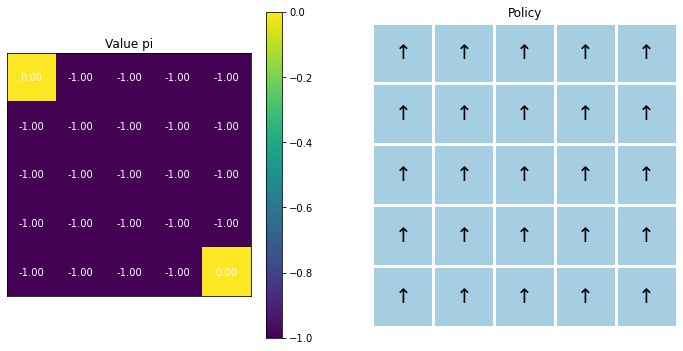

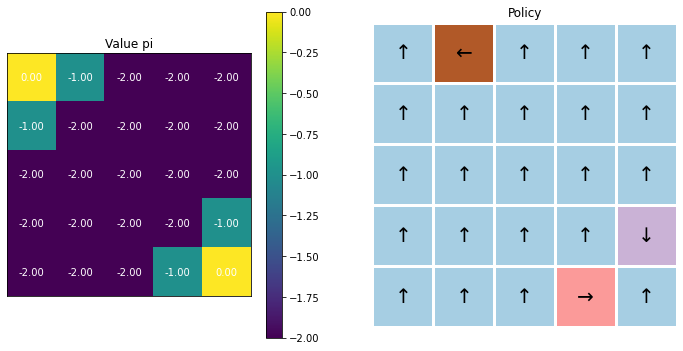

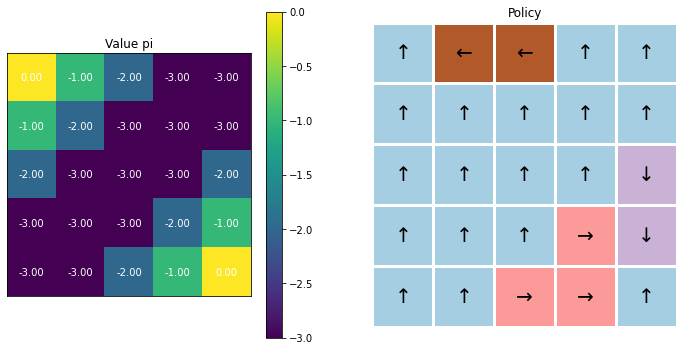

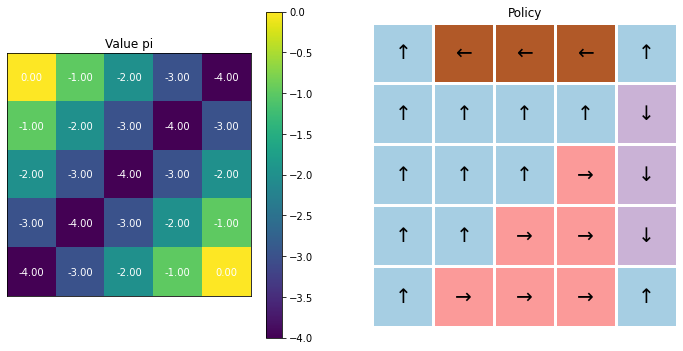

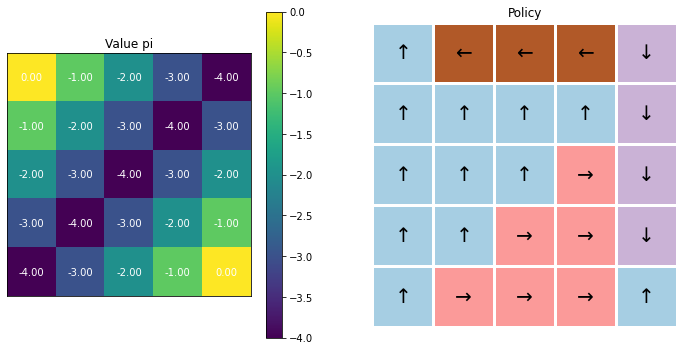

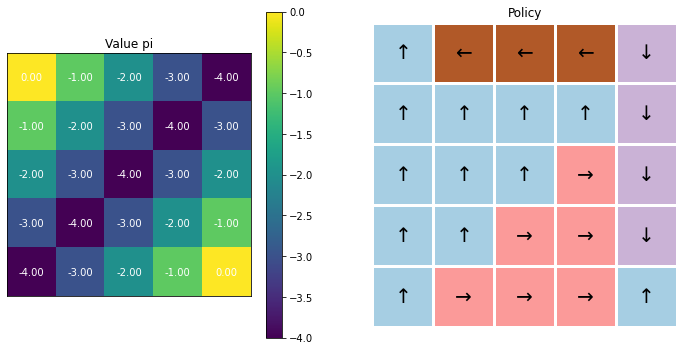

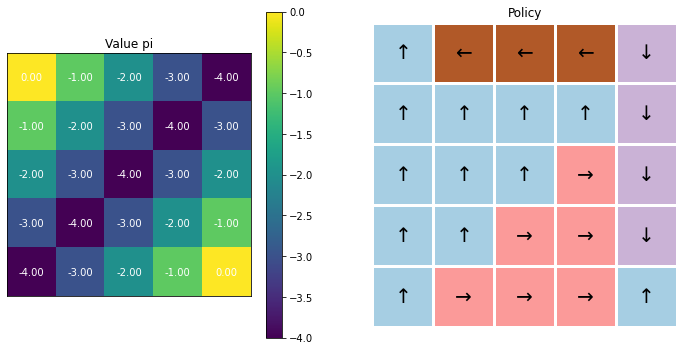

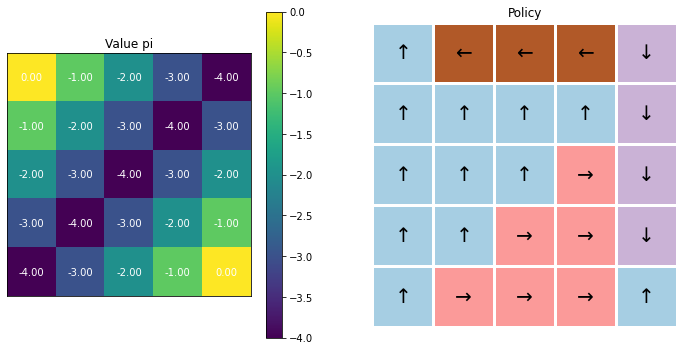

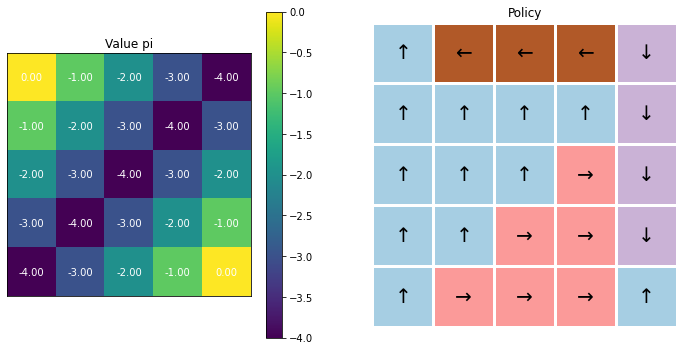

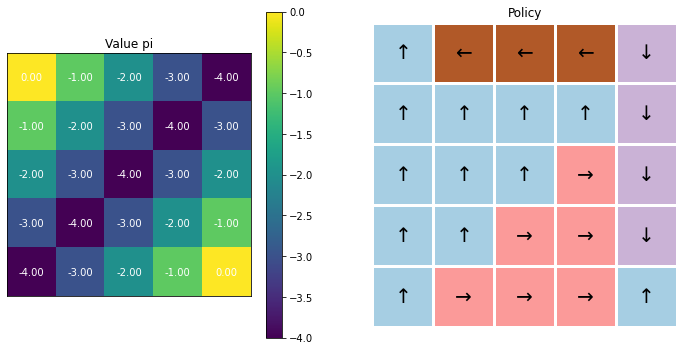

In [ ]:
# practice 3 - Value Iteration
v = np.zeros(ns)
policy=np.ones([env.nS, env.nA]) / env.nA 
iteration = 10
for i in range(iteration):
  v, policy = ValueIteration(v, policy, 1)
  
  fig, ax = plt.subplots(1,2, figsize=(12,6))
  visualize_value_function(ax[0], v, nx, ny)
  _ = ax[0].set_title("Value pi")
  visualize_policy(ax[1], policy, nx, ny)
  _ = ax[1].set_title("Policy")